Importing Dependecies

In [ ]:
import keras 
import os
import pandas as pd
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential

In [2]:
path = '/users/anurag/desktop/dogs_cats'
train_dir = path +'/train1'
validation_dir = path + '/validation'
img_width,img_height = 50,50 #making images width and height to be 50

Automatically retrieving images from their folder

In [3]:
# used to rescale the pixel values from [0, 255] to [0, 1] interval
datagen = ImageDataGenerator(rescale=1./255)

# automatically retrieve images and their classes for train and validation sets
train_generator = datagen.flow_from_directory(
        train_dir,
        target_size=(img_width, img_height),
        color_mode='grayscale',
        batch_size=32,
        class_mode='categorical')

validation_generator = datagen.flow_from_directory(
        validation_dir,
        target_size=(img_width, img_height),
        color_mode='grayscale',
        batch_size=32,
        class_mode='categorical')

Found 25000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


Defining the Model

In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height,1))) #taking filter window to be of 3X3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #pooling of 2X2 with stride to be 1

model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))  #pooling of 2X2 with stride to be 1

model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))  #pooling of 2X2 with stride to be 1

model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))  #pooling of 2X2 with stride to be 1

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.8))

model.add(Dense(2))
model.add(Activation('sigmoid'))

Defining the optimizer

In [5]:
rmsprop = optimizers.RMSprop(lr=1e-4)

Compiling the model

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])

In [7]:
batch = 50
history = model.fit_generator(
        train_generator,
        steps_per_epoch = 25000/batch,
        epochs = 20 ,
        validation_data = validation_generator,
        validation_steps=4000/batch)


Epoch 1/20
500/500 [==============================] - 237s 473ms/step - loss: 0.6541 - acc: 0.6370 - val_loss: 0.5547 - val_acc: 0.7145
Epoch 2/20
500/500 [==============================] - 195s 389ms/step - loss: 0.5442 - acc: 0.7331 - val_loss: 1.5341 - val_acc: 0.5309
Epoch 3/20
500/500 [==============================] - 219s 437ms/step - loss: 0.4829 - acc: 0.7756 - val_loss: 0.4635 - val_acc: 0.7797
Epoch 4/20
500/500 [==============================] - 206s 411ms/step - loss: 0.4326 - acc: 0.8044 - val_loss: 0.5028 - val_acc: 0.7746
Epoch 5/20
500/500 [==============================] - 203s 405ms/step - loss: 0.4010 - acc: 0.8265 - val_loss: 0.4240 - val_acc: 0.8238
Epoch 6/20
500/500 [==============================] - 199s 399ms/step - loss: 0.3737 - acc: 0.8407 - val_loss: 0.3512 - val_acc: 0.8348
Epoch 7/20
500/500 [==============================] - 188s 376ms/step - loss: 0.3353 - acc: 0.8572 - val_loss: 0.4685 - val_acc: 0.8102
Epoch 8/20
500/500 [============================

Evaluating the model on the validation data itself

In [9]:
model.evaluate_generator(validation_generator, 100)

[0.6732596755027771, 0.84437499999999999]

In [10]:
import matplotlib.pyplot as plt

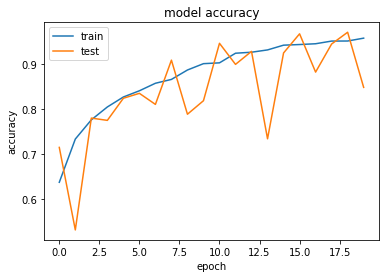

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

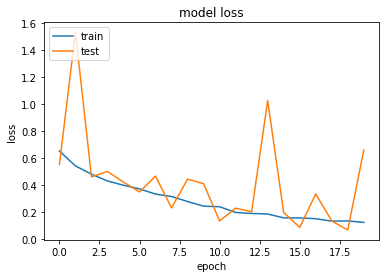

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()